<a href="https://colab.research.google.com/github/treva-123mutebi/30-Days-Of-JavaScript/blob/master/TimeseriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# prompt: read file Airpassengers.csv from folder sample_data

data = pd.read_csv('/content/sample_data/AirPassengers.csv')



In [42]:
data.isnull()

,Month,#Passengers
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
139,False,False
140,False,False
141,False,False
142,False,False


In [43]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [44]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [45]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


<Axes: xlabel='Month', ylabel='#Passengers'>

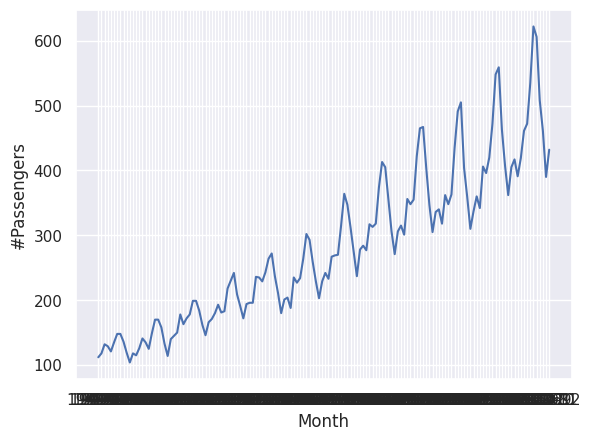

In [46]:
sns.lineplot(data, x='Month', y='#Passengers')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [48]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

In [49]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [50]:
#converting month column to an index
data.index = data['Month']

In [51]:
del data['Month']

In [52]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [53]:
#Methodologies of forecasting
 #1.Arima - Autoregressive Moving Average
 #2.Salima - Seasonal Autoregressive Moving Average

#Testing for stationality.
#Stationality is where data has a predictable pattern and there is a consistent visible trend.
#Dickey fuller's formula is used to test stationality


In [54]:
rolling_mean = data.rolling(8).mean()
rolling_std = data.rolling(8).std()

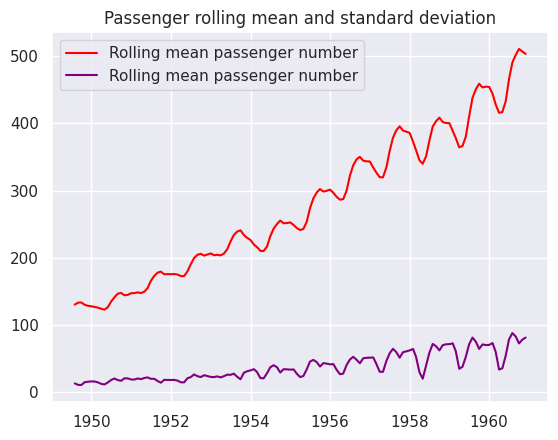

In [55]:
#Displaying original curve
#plt.plot(data, color='blue',label='Original passenger data')

#Ploting mean
plt.plot(rolling_mean, color='red',label='Rolling mean passenger number')

#Ploting standard deviation
plt.plot(rolling_std, color='purple',label='Rolling mean passenger number')
plt.title(label = 'Passenger rolling mean and standard deviation')
plt.legend(loc = 'best')

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

from math import sqrt
#from sklearn.metrics
#Importing a package for dickey fuller's formular
from statsmodels.tsa.stattools import adfuller

In [57]:
# Importing a package for dickey fuller's formular
from statsmodels.tsa.stattools import adfuller

In [24]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.5 MB/s eta 0:00:00


In [58]:
from pmdarima.arima import auto_arima

In [59]:
adft = adfuller(data,autolag='AIC')

output_data = pd.DataFrame({"Values": [adft[0], adft[1], adft[2], adft[3], adft[4]['1%'],adft[4]['5%'], adft[4]['10%']],
                            "Metric": ["Test statistics", "P-value", "Number of lags used", "Number of observations used", "Critical values(1%)",
                                       "Critical values(5%)", "Critical values(10%)"]})
#print(output_data)

In [60]:
# The determinant of stationality is the p-value. When the p-value is greater than the 5% critical value our data is notstationary.

#Autocorrelation is the measure of how auto correlated data series are at a given time with past values.
#This means that if our data has a strong correlation we can assume,
 #that there will be a strong likelyhood that if our paasengers are high today they will also be high tomorrow.
auto_correlation_1 = data['#Passengers'].autocorr(lag=1)
auto_correlation_3 = data['#Passengers'].autocorr(lag=3)
auto_correlation_6 = data['#Passengers'].autocorr(lag=6)

One month lag :  0.9601946480498523
Three month lag :  0.837394765081794
Six month lag :  0.7839187959206183


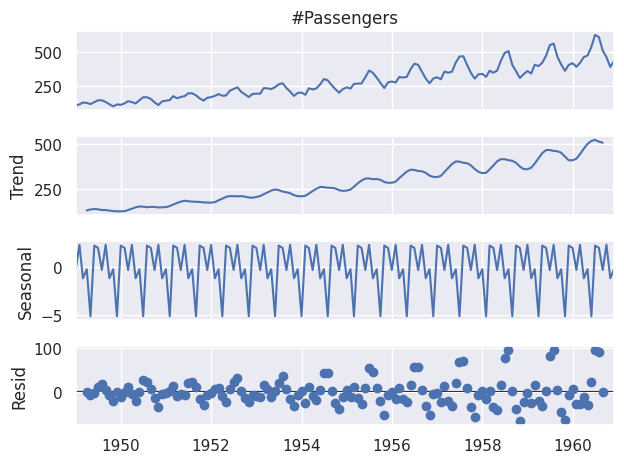

In [61]:
print('One month lag : ', auto_correlation_1)
print('Three month lag : ', auto_correlation_3)
print('Six month lag : ', auto_correlation_6)

decompose = seasonal_decompose(data['#Passengers'], model="additive",period = 7)
decompose.plot()
plt.show()

#We  have to split the data into two, the training and testing data

<ipython-input-62-1b559e2c2403>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['#Passengers']
<ipython-input-62-1b559e2c2403>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['#Passengers']


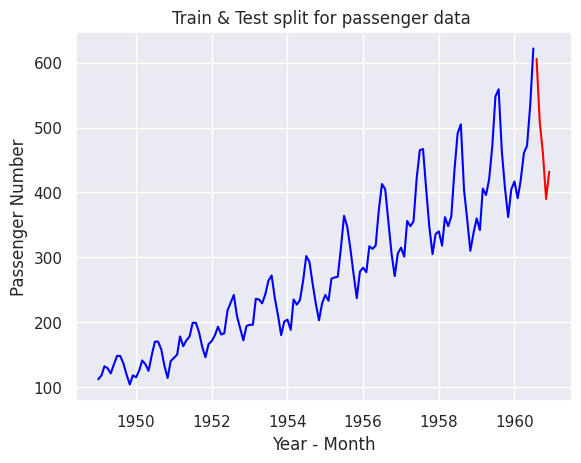

In [62]:
#Training data
data['Date'] = data.index

train = data[data['Date'] < pd.to_datetime("1960-08", format="%Y-%m")]
train['train'] = train['#Passengers']

del train['Date']
del train['#Passengers']

#Testing data
test = data[data['Date'] >= pd.to_datetime("1960-08", format="%Y-%m")]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color='blue')
plt.plot(test, color='red')
plt.title('Train & Test split for passenger data ')
plt.ylabel('Passenger Number')
plt.xlabel('Year - Month')
sns.set()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

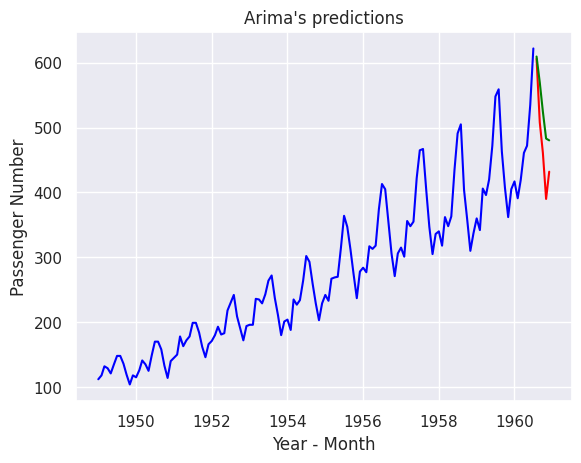

In [63]:
#Generating predictions using auto_arima.
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(test))

forecast = pd.DataFrame(forecast,index=test.index, columns=['Predictions'])
plt.plot(train, color='blue')
plt.plot(test, color='red')
plt.plot(forecast, color='green')
plt.title("Arima's predictions")
plt.ylabel('Passenger Number')
plt.xlabel('Year - Month')
print(forecast)




In [64]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [65]:
#Root mean squared error.
#This shows us how accurate or how far off our prediction is
rms = sqrt(mean_squared_error(test,forecast))

In [66]:
rms

61.36446753530628